# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [227]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
from citipy import citipy
from config2 import weatherapikey


# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weatherapikey}&units={units}&q="

cityweather = requests.get(query_url + "London").json()
pprint(cityweather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1579991451,
 'id': 2643743,
 'main': {'feels_like': 36.55,
          'humidity': 96,
          'pressure': 1015,
          'temp': 42.39,
          'temp_max': 45,
          'temp_min': 39.99},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2019646,
         'sunrise': 1579938572,
         'sunset': 1579970134,
         'type': 3},
 'timezone': 0,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 174, 'speed': 6.87}}


In [98]:
#set up a bunch of empty lists to hold values from our json response
name = []
temp = []
lat = []
long = []
clouds = []
hum = []
wind_s = []
wind_a = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

i = 0
for city in cities:
    print(f'Processing {city}. #{i+1} of {len(cities)+1}')
    i += 1
    # Build query URL
    query_url = f"{url}appid={weatherapikey}&units={units}&q="
    cityweather = requests.get(query_url + city).json()
    #metrics to capture from the response
    try:
        name.append(cityweather["name"])
        lat.append(cityweather["coord"]["lat"])
        long.append(cityweather["coord"]["lon"])
        temp.append(cityweather["main"]["temp"])
        clouds.append(cityweather["clouds"]["all"])
        hum.append(cityweather["main"]["humidity"])
        wind_s.append(cityweather["wind"]["speed"])
                    
    except:
        print(f'Skipping {city} due to errors.')


Processing zyryanka. #1 of 617
Processing mys shmidta. #2 of 617
Skipping mys shmidta due to errors.
Processing hobart. #3 of 617
Processing amderma. #4 of 617
Skipping amderma due to errors.
Processing bredasdorp. #5 of 617
Processing vaini. #6 of 617
Processing jamestown. #7 of 617
Processing balimo. #8 of 617
Skipping balimo due to errors.
Processing rikitea. #9 of 617
Processing barrow. #10 of 617
Processing kapaa. #11 of 617
Processing chokurdakh. #12 of 617
Processing laurel. #13 of 617
Processing khatanga. #14 of 617
Processing dingle. #15 of 617
Processing brae. #16 of 617
Processing nizhneyansk. #17 of 617
Skipping nizhneyansk due to errors.
Processing tasiilaq. #18 of 617
Processing albany. #19 of 617
Processing castro. #20 of 617
Processing saint-philippe. #21 of 617
Processing belushya guba. #22 of 617
Skipping belushya guba due to errors.
Processing fortuna. #23 of 617
Processing vostok. #24 of 617
Processing esperance. #25 of 617
Processing ushuaia. #26 of 617
Processing 

Processing margate. #235 of 617
Processing severo-kurilsk. #236 of 617
Processing camacha. #237 of 617
Processing muros. #238 of 617
Processing san patricio. #239 of 617
Processing salalah. #240 of 617
Processing sorvag. #241 of 617
Skipping sorvag due to errors.
Processing innisfail. #242 of 617
Processing carauari. #243 of 617
Processing stornoway. #244 of 617
Processing shenjiamen. #245 of 617
Processing brownwood. #246 of 617
Processing marrakesh. #247 of 617
Processing santiago. #248 of 617
Processing santa cruz. #249 of 617
Processing hami. #250 of 617
Processing mar del plata. #251 of 617
Processing adamantina. #252 of 617
Processing yamaga. #253 of 617
Processing jiangyou. #254 of 617
Processing vanimo. #255 of 617
Processing palabuhanratu. #256 of 617
Skipping palabuhanratu due to errors.
Processing sao filipe. #257 of 617
Processing aasiaat. #258 of 617
Processing biak. #259 of 617
Processing butterworth. #260 of 617
Processing tuatapere. #261 of 617
Processing kachikau. #262

Processing susanville. #471 of 617
Processing christchurch. #472 of 617
Processing kyaiklat. #473 of 617
Processing sept-iles. #474 of 617
Processing paveh. #475 of 617
Processing dinguiraye. #476 of 617
Processing rawson. #477 of 617
Processing montgomery. #478 of 617
Processing rudnogorsk. #479 of 617
Processing aykhal. #480 of 617
Processing dongobesh. #481 of 617
Processing teknaf. #482 of 617
Processing jiuquan. #483 of 617
Processing abay. #484 of 617
Processing abu jubayhah. #485 of 617
Skipping abu jubayhah due to errors.
Processing tabuk. #486 of 617
Processing jiwani. #487 of 617
Processing daly city. #488 of 617
Processing urdzhar. #489 of 617
Skipping urdzhar due to errors.
Processing the valley. #490 of 617
Processing curup. #491 of 617
Processing atkarsk. #492 of 617
Processing paita. #493 of 617
Processing assiniboia. #494 of 617
Processing chicama. #495 of 617
Processing nelson. #496 of 617
Processing nador. #497 of 617
Processing snasa. #498 of 617
Processing kenai. #4

In [103]:
print(len(name))
print(len(lat))
print(len(long))
print(len(temp))
print(len(clouds))
print(len(hum))
print(len(wind_s))


576
576
576
576
576
576
576


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [152]:
weatherdf = pd.DataFrame({"CityName":name,
                          "Latitude":lat,
                          "Longitude":long,
                          "Temperature":temp,
                          "Clouds":clouds,
                          "Humidity":hum,
                          "Windspeed":wind_s})
weatherdf

,CityName,Latitude,Longitude,Temperature,Clouds,Humidity,Windspeed
0,Zyryanka,65.75,150.85,-28.52,100,96,4.21
1,Hobart,-42.88,147.33,65.84,86,64,1.01
2,Bredasdorp,-34.53,20.04,66.13,31,68,21.92
3,Vaini,-21.20,-175.20,78.55,25,87,19.64
4,Jamestown,42.10,-79.24,35.06,100,93,4.00
...,...,...,...,...,...,...,...
571,Mariehamn,60.10,19.93,37.67,100,91,21.00
572,Kamaishi,39.27,141.88,31.93,88,45,2.53
573,Bubaque,11.28,-15.83,77.58,92,75,13.38
574,Punto Fijo,11.70,-70.20,78.22,6,82,15.08


In [156]:
vapor = pd.read_csv("vaporpressure.csv")
vapor

def interpolate(val):
    Psat = np.polyfit(vapor["TempF"],vapor["Psat"],2)
    return Psat[0]*val**2 + Psat[1]*val + Psat[0]

weatherdf["pw"] = interpolate(weatherdf["Temperature"])*(weatherdf["Humidity"]/100)
weatherdf

,CityName,Latitude,Longitude,Temperature,Clouds,Humidity,Windspeed,pw
0,Zyryanka,65.75,150.85,-28.52,100,96,4.21,26.283731
1,Hobart,-42.88,147.33,65.84,86,64,1.01,8.326025
2,Bredasdorp,-34.53,20.04,66.13,31,68,21.92,9.045226
3,Vaini,-21.20,-175.20,78.55,25,87,19.64,24.150875
4,Jamestown,42.10,-79.24,35.06,100,93,4.00,-5.857438
...,...,...,...,...,...,...,...,...
571,Mariehamn,60.10,19.93,37.67,100,91,21.00,-5.061967
572,Kamaishi,39.27,141.88,31.93,88,45,2.53,-3.132149
573,Bubaque,11.28,-15.83,77.58,92,75,13.38,19.870720
574,Punto Fijo,11.70,-70.20,78.22,6,82,15.08,22.407781


In [153]:
xaxis=np.arange(weatherdf["Temperature"].min(),weatherdf["Temperature"].max())
fit = np.polyfit(weatherdf["Latitude"],weatherdf["Temperature"],2)
yfit = [(fit[0]*x**2 + fit[1]*x+fit[2]) for x in xaxis]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

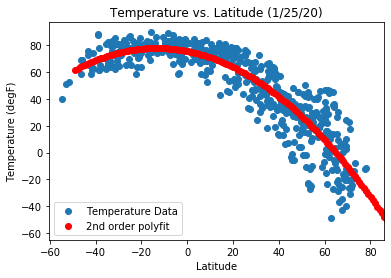

In [138]:
plt.scatter(weatherdf["Latitude"],weatherdf["Temperature"], label = "Temperature Data")
plt.scatter(xaxis,yfit,color = 'red', label = "2nd Order Polyfit")
plt.title("Temperature vs. Latitude (1/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (degF)")
plt.legend(loc = 'best')
plt.xlim(weatherdf["Latitude"].min()*1.1,weatherdf["Latitude"].max()*1.1)
plt.show()

#### Latitude vs. Humidity Plot

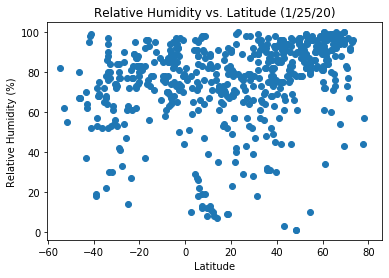

In [119]:
plt.scatter(weatherdf["Latitude"],weatherdf["Humidity"])
plt.title("Relative Humidity vs. Latitude (1/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Relative Humidity (%)")
plt.xlim(weatherdf["Latitude"].min()*1.1,weatherdf["Latitude"].max()*1.1)
plt.show()

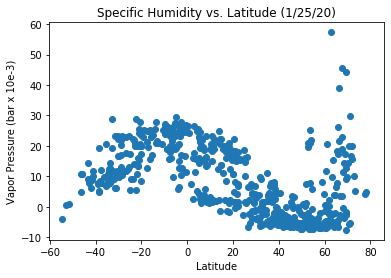

In [164]:
plt.scatter(weatherdf["Latitude"],weatherdf["pw"])
plt.title("Specific Humidity vs. Latitude (1/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Vapor Pressure (bar x 10e-3)")
plt.xlim(weatherdf["Latitude"].min()*1.1,weatherdf["Latitude"].max()*1.1)
plt.show()

#### Latitude vs. Cloudiness Plot

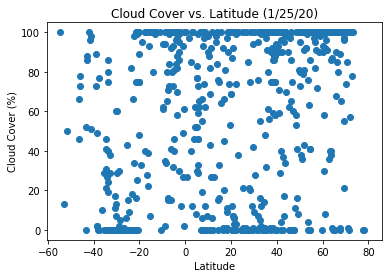

In [120]:
plt.scatter(weatherdf["Latitude"],weatherdf["Clouds"])
plt.title("Cloud Cover vs. Latitude (1/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.xlim(weatherdf["Latitude"].min()*1.1,weatherdf["Latitude"].max()*1.1)
plt.show()

#### Latitude vs. Wind Speed Plot

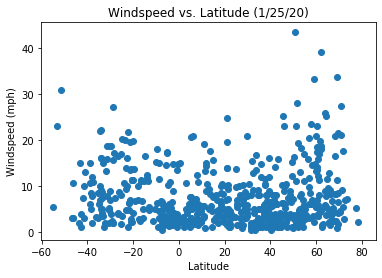

In [122]:
plt.scatter(weatherdf["Latitude"],weatherdf["Windspeed"])
plt.title("Windspeed vs. Latitude (1/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlim(weatherdf["Latitude"].min()*1.1,weatherdf["Latitude"].max()*1.1)
plt.show()

## Linear Regression

In [222]:
#make a function that takes 5 arguments as inputs: DF x vals, DF y vals, x label, y label, plot title
#function performs least squares linear regression using linregress from numpy
#plot is labelled according to args and linear regression stats
#this function will be used to complete the repetitive plotting activity further down in the workbook

def plotter(args):
    if len(args) != 5:
        print("You forgot something!")
    #split out out arguments
    xvar = args[0]
    yvar = args[1]
    xlabel = args[2]
    ylabel = args[3]
    thistitle = args[4]
    
    #linear regression
    xmin = xvar.min()
    xmax = xvar.max()
    xaxis = np.arange(xmin,xmax)
    line = linregress(xvar,yvar)
    linefit = [x*line[0]+line[1] for x in xaxis]
    
    #plotting functions
    fig1 = plt.scatter(xvar,yvar,color = "blue", label = thistitle)
    fig1 = plt.scatter(xaxis,linefit,color = "red", label = f'Slope: {"{:.2f}".format(line[0])}, Int: {"{:.2f}".format(line[1])}, r^2: {"{:.2f}".format(line[2]**2)}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = "best")
    plt.title(thistitle)
    
    #the result is the plot!
    return plt.show()
    

In [223]:
# Create Northern and Southern Hemisphere DataFrames
nhdf = weatherdf.loc[(weatherdf["Latitude"] > 0) ]
nhdf.head()

,CityName,Latitude,Longitude,Temperature,Clouds,Humidity,Windspeed,pw
0,Zyryanka,65.75,150.85,-28.52,100,96,4.21,26.283731
4,Jamestown,42.10,-79.24,35.06,100,93,4.00,-5.857438
6,Barrow,71.29,-156.79,-31.00,1,97,9.17,29.780195
7,Kapaa,22.08,-159.32,77.00,74,70,1.01,18.024108
8,Chokurdakh,70.63,147.92,-26.25,85,82,4.25,20.065461


In [224]:
shdf = weatherdf.loc[(weatherdf["Latitude"] < 0) ]
shdf.head()    

,CityName,Latitude,Longitude,Temperature,Clouds,Humidity,Windspeed,pw
1,Hobart,-42.88,147.33,65.84,86,64,1.01,8.326025
2,Bredasdorp,-34.53,20.04,66.13,31,68,21.92,9.045226
3,Vaini,-21.20,-175.20,78.55,25,87,19.64,24.150875
5,Rikitea,-23.12,-134.97,79.25,18,77,14.03,22.089056
15,Castro,-24.79,-50.01,65.70,9,72,3.38,9.265680


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

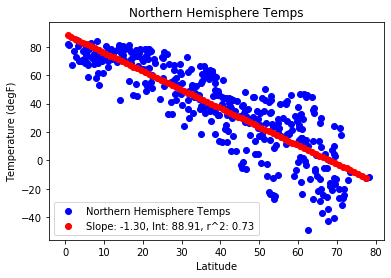

In [225]:
plotter([nhdf["Latitude"],
         nhdf["Temperature"],
         "Latitude",
         "Temperature (degF)",
         "Northern Hemisphere Temps"])

In [ ]:
#There is a fairly clear trend toward decreasing temperatures as latitudes increase in the Northern Hemisphere.
#There is less scatter in the data at lower latitudes (i.e closer to the Equator), more scatter at higher latitudes.
#An r-squared value of 0.73 indicates a fairly strong relationship
#Altitude or proximity to other major driving forces in weather (bodies of water, mountains etc.) is not considered here
#   but is likely a major source of the scatter in the data


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

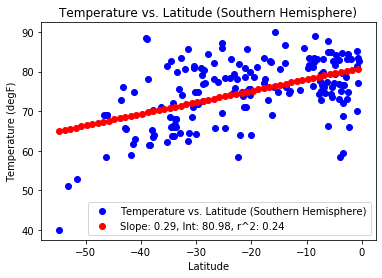

In [198]:
plotter([shdf["Latitude"],
         shdf["Temperature"],
         "Latitude",
         "Temperature (degF)",
         "Temperature vs. Latitude (Southern Hemisphere)"])

In [ ]:
#In the southern hemisphere cities sampled there is a weaker relationship between temperature and latitude than with the northern hemisphere
#There is still a trend toward higher temps at latitudes closer to the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

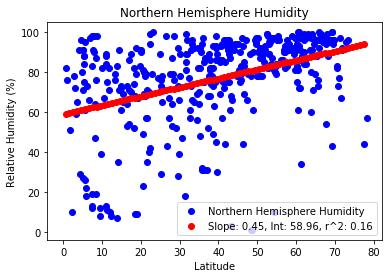

In [201]:
plotter([nhdf["Latitude"],
         nhdf["Humidity"],
         "Latitude",
         "Relative Humidity (%)",
         "Northern Hemisphere Humidity"])

In [ ]:
#Relative humidity is not really worth studying because it is so dependent on other air properties.
#Temperature has an enormous effect on relative humidity (i.e as temperature increases the saturation water vapor pressure increases)
#We would generally expect the largest absolute humidity around the tropics

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

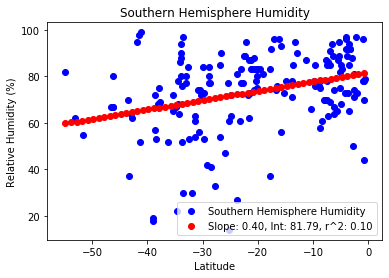

In [202]:
plotter([shdf["Latitude"],
         shdf["Humidity"],
         "Latitude",
         "Relative Humidity (%)",
         "Southern Hemisphere Humidity"])

In [ ]:
#The Southern Hemisphere data also shows a very weak correlation between humidity and latitude.
#Again, relative humidity is a very poor measure of climate without also considering ambient temp.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

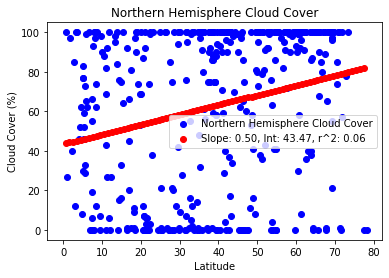

In [203]:
plotter([nhdf["Latitude"],
         nhdf["Clouds"],
         "Latitude",
         "Cloud Cover (%)",
         "Northern Hemisphere Cloud Cover"])

In [ ]:
#The cloud cover data presented here shows no correlation between cloudiness and latitude. There are concentrations of
#  both extremes of cloud cover % are seen across the full latitude range, with random scatter in between.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

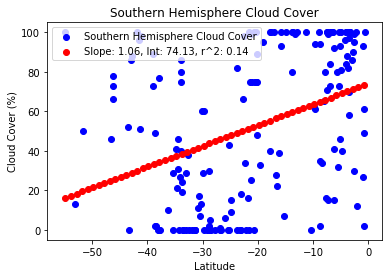

In [204]:
plotter([shdf["Latitude"],
         shdf["Clouds"],
         "Latitude",
         "Cloud Cover (%)",
         "Southern Hemisphere Cloud Cover"])

In [ ]:
#It appears as though the cloudiest areas in the southern hemisphere right now are at the highest latitudes (i.e closer to the equator),
#   while the tropics are experiencing few clouds, but overall there is not a strong correlation between cloudiness and latitude
#   in either hemisphere


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

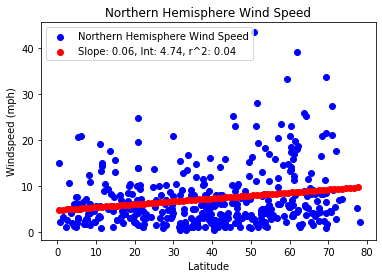

In [205]:
plotter([nhdf["Latitude"],
         nhdf["Windspeed"],
         "Latitude",
         "Windspeed (mph)",
         "Northern Hemisphere Wind Speed"])

In [ ]:
#there is absolutely no correlation between wind speed and latitude in either hemisphere, 
#though there is more scatter in the data closer to the poles

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

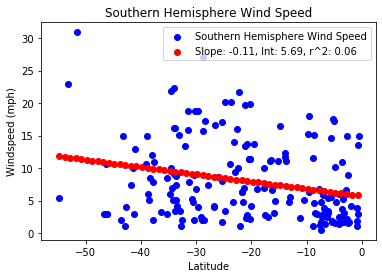

In [207]:
plotter([shdf["Latitude"],
         shdf["Windspeed"],
         "Latitude",
         "Windspeed (mph)",
         "Southern Hemisphere Wind Speed"])

In [ ]:
#there is absolutely no correlation between wind speed and latitude in either hemisphere, 
#though there is more scatter in the data closer to the poles

In [228]:
#export data to a file called weatherdatabycity.csv
weatherdf.to_csv("weatherdatabycity.csv")